In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Customers = pd.read_csv('/content/Customers.csv')
Products = pd.read_csv('/content/Products.csv')
Transactions = pd.read_csv('/content/Transactions.csv')

In [ ]:
print(Customers.isnull().sum())
print(Products.isnull().sum())
print(Transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
print(Customers.info())
print('\n')
print(Products.info())
print('\n')
print(Transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           ---

In [ ]:
print(Customers.describe())
print(Products.describe())
print(Transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                  TransactionDate     Quantity   TotalValue       Price
count                        1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:32:32.580000     2.537000   689.995560   272.55407
min           2023-12-30 15:29:00     1.000000    16.080000    16.08000
25%           2024-03-25 22:05:00     2.000000   295.295000   147.95000
50%           2024-06-26 17:21:30     3.000000   588.880000   299.93000
75%           2024-09-19 14:19:30     4.000000  1011.660000   404.40000
max           2024-

# **EDA**

**Product**

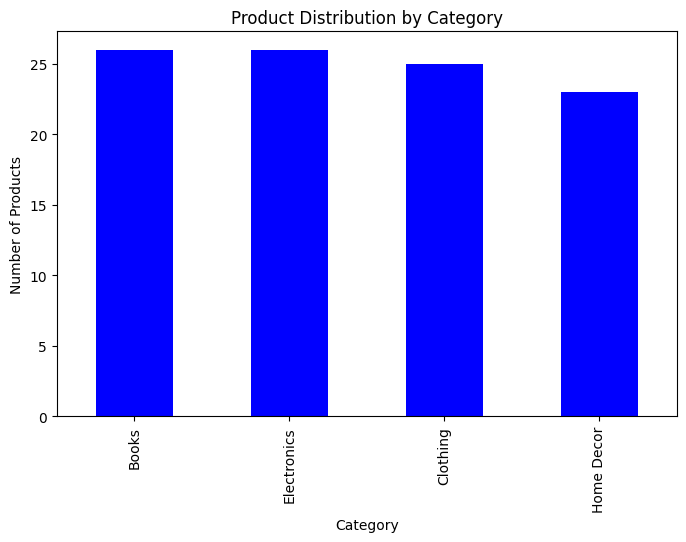

In [ ]:
# Category wise taking the count
category_counts = Products['Category'].value_counts()

category_counts.plot(kind='bar', color='blue', figsize=(8, 5))
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

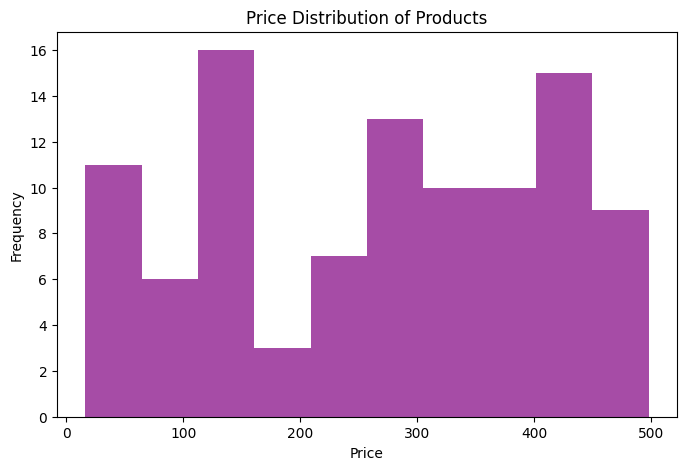

In [ ]:
# Plotting of price distribution
plt.figure(figsize=(8, 5))
plt.hist(Products['Price'], bins=10, color='purple', alpha=0.7)
plt.title('Price Distribution of Products')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


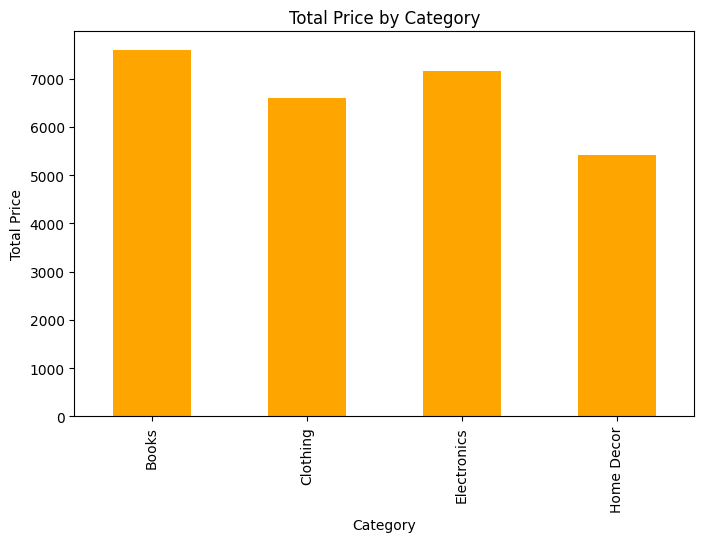

In [ ]:
# Summing up the price of all products category wise
category_price = Products.groupby('Category')['Price'].sum()

category_price.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Total Price by Category')
plt.xlabel('Category')
plt.ylabel('Total Price')
plt.show()

**Transactions**

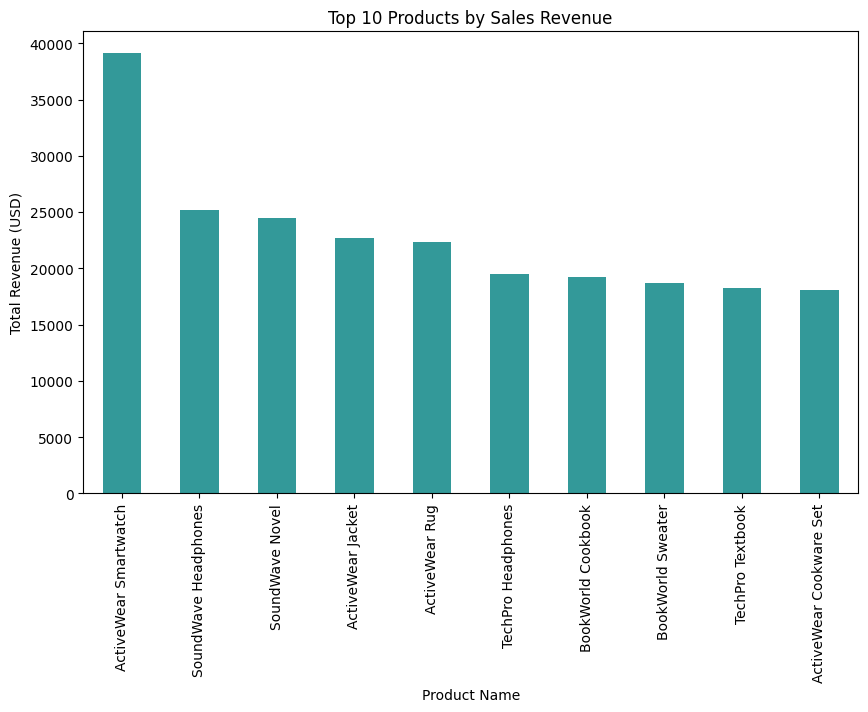

In [5]:
# Merges Transaction data with product data to include ProductName
transactions_with_names = Transactions.merge(Products, on='ProductID', how='left')

# here it will Group by ProductName and calculate total sales revenue
product_revenue = transactions_with_names.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)

top_products = product_revenue.head(10)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Top 10 Products by Sales Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue USD')
plt.show()

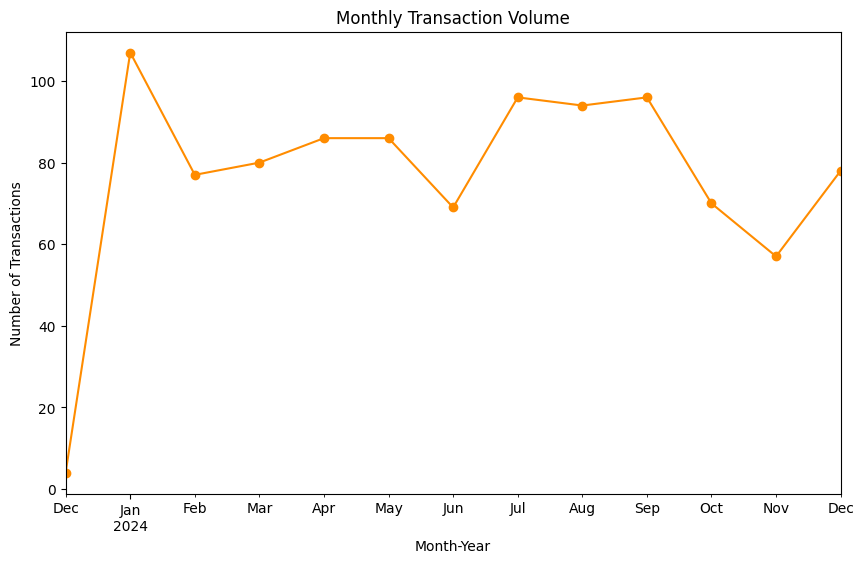

In [ ]:
# Converting TransactionDate to datetime
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'], format='%d-%m-%Y %H:%M')

# Extractting month and year
Transactions['MonthYear'] = Transactions['TransactionDate'].dt.to_period('M')

monthly_transactions = Transactions.groupby('MonthYear').size()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o', color='darkorange')
plt.title('Monthly Transaction Volume')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.show()


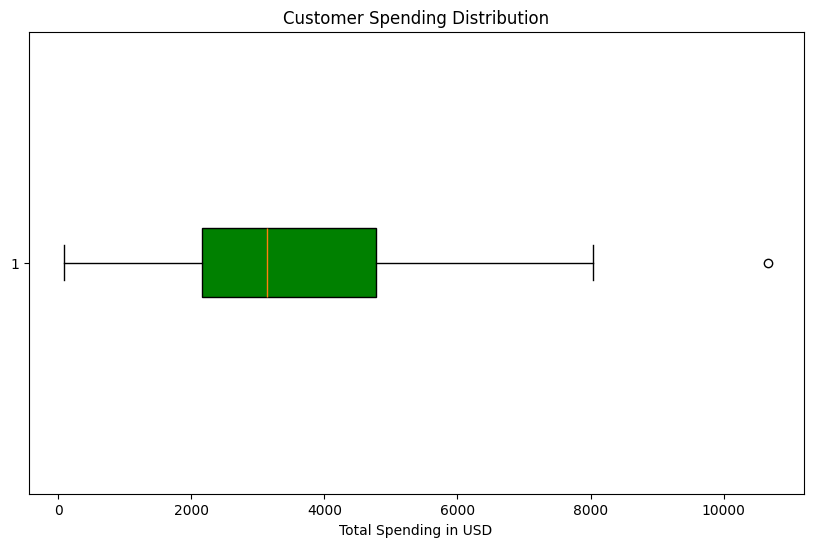

In [ ]:
# Group by CustomerID and sum TotalValue
customer_spending = Transactions.groupby('CustomerID')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
plt.boxplot(customer_spending, vert=False, patch_artist=True, boxprops=dict(facecolor='green'))
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending in USD')
plt.show()


**Customers**

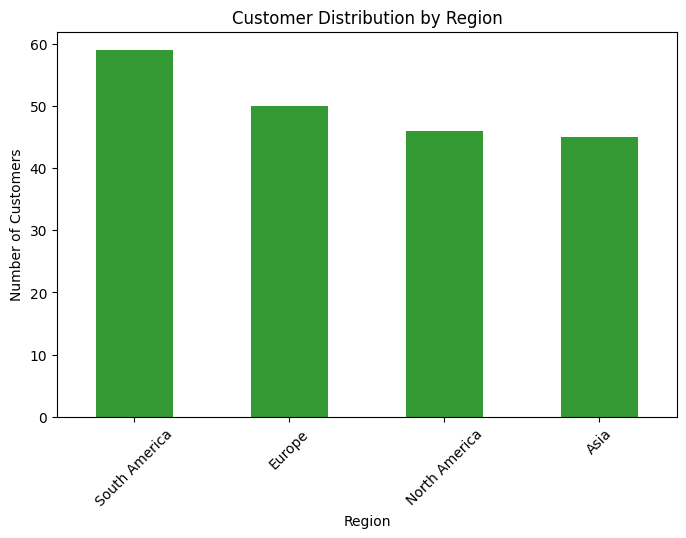

In [ ]:
#Counting the total number of customers in region wise
region_counts = Customers['Region'].value_counts()

plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='Green', alpha=0.8)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()